# Cybersecurity Incidents & Data Breaches 2024: Data Mining & Analysis
---
**Author:** Franz Kingstein  
**Date:** September 2025
 
This notebook explores and analyzes the Kaggle dataset on major cybersecurity incidents and data breaches reported in 2024. We will perform data cleaning, exploratory data analysis (EDA), risk factor analysis, and predictive modeling to uncover trends and actionable insights relevant for business, research, and cybersecurity professionals.

---

In [2]:
import pandas as pd 

df = pd.read_csv("Cybersecurity Incidents and Data Breaches 2024.csv")
df.head()

,Incident_ID,Date_Reported,Company_Name,Industry,Country,Attack_Type,Records_Compromised,Attack_Vector,Data_Types_Stolen,Ransom_Amount_USD,...,Patch_Status,MFA_Enabled,Security_Training_Hours,Incident_Severity,Attribution,Response_Time_Hours,Regulatory_Fine_Million_USD,Stock_Impact_Percent,Customer_Churn_Percent,Reputation_Score_Change
0,CYB_001,2024-01-15,HealthTech Solutions,Healthcare,United States,Ransomware,2400000,Phishing_Email,"PII,PHI,Financial",2.5,...,Outdated,No,8,Critical,APT29,72,8.5,-12.3,15.2,-25
1,CYB_002,2024-01-22,GlobalBank Corp,Financial,United Kingdom,Data_Breach,890000,SQL_Injection,"Financial,PII",0.0,...,Current,Yes,24,High,Unknown,12,15.2,-8.7,8.9,-18
2,CYB_003,2024-02-03,EduPlatform Inc,Education,Canada,Ransomware,567000,Remote_Access,"PII,Academic_Records",1.2,...,Outdated,No,4,High,Conti,96,2.1,-5.4,12.1,-15
3,CYB_004,2024-02-14,RetailGiant Ltd,Retail,Australia,Payment_Fraud,1200000,Card_Skimming,"Payment_Cards,PII",0.0,...,Current,Partial,12,High,Organized_Crime,6,0.0,-3.2,6.7,-8
4,CYB_005,2024-02-28,TechStartup Pro,Technology,Germany,Insider_Threat,45000,Privileged_Access,"IP,Customer_Data",0.0,...,Current,Yes,16,Medium,Employee,24,0.0,-1.8,3.4,-5


## 1. Data Loading & Initial Exploration
Let's load the dataset and take a first look at its structure and contents.

a. Handle Missing Values

In [ ]:
# Check data structure and summary statistics
df.info()
df.describe(include = 'all')
# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Incident_ID                   25 non-null     object 
 1   Date_Reported                 25 non-null     object 
 2   Company_Name                  25 non-null     object 
 3   Industry                      25 non-null     object 
 4   Country                       25 non-null     object 
 5   Attack_Type                   25 non-null     object 
 6   Records_Compromised           25 non-null     int64  
 7   Attack_Vector                 25 non-null     object 
 8   Data_Types_Stolen             25 non-null     object 
 9   Ransom_Amount_USD             25 non-null     float64
 10  Recovery_Time_Days            25 non-null     int64  
 11  Financial_Impact_Million_USD  25 non-null     float64
 12  CISO_Present                  25 non-null     object 
 13  Securit

Incident_ID                     0
Date_Reported                   0
Company_Name                    0
Industry                        0
Country                         0
Attack_Type                     0
Records_Compromised             0
Attack_Vector                   0
Data_Types_Stolen               0
Ransom_Amount_USD               0
Recovery_Time_Days              0
Financial_Impact_Million_USD    0
CISO_Present                    0
Security_Budget_Million_USD     0
Employee_Count                  0
Previous_Incidents              0
Patch_Status                    0
MFA_Enabled                     0
Security_Training_Hours         0
Incident_Severity               0
Attribution                     1
Response_Time_Hours             0
Regulatory_Fine_Million_USD     0
Stock_Impact_Percent            0
Customer_Churn_Percent          0
Reputation_Score_Change         0
dtype: int64

## 2. Data Cleaning & Preparation
Before analysis, we need to handle missing values and ensure all columns are in the correct format.

### Clean and Prepare the Data

a. Handle Missing Values

In [ ]:
# Fill missing values with 0 (or choose another strategy as needed)
df = df.fillna(0)

b. Convert Data Types



In [ ]:
# Convert date and financial columns to appropriate types
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], errors='coerce')
df['Financial_Impact_Million_USD'] = pd.to_numeric(df['Financial_Impact_Million_USD'], errors='coerce')

## 3. Exploratory Data Analysis (EDA)
Let's visualize and explore the main trends and patterns in the data.

### Exploratory Data Analysis (EDA)

a. Visualize Attack Types

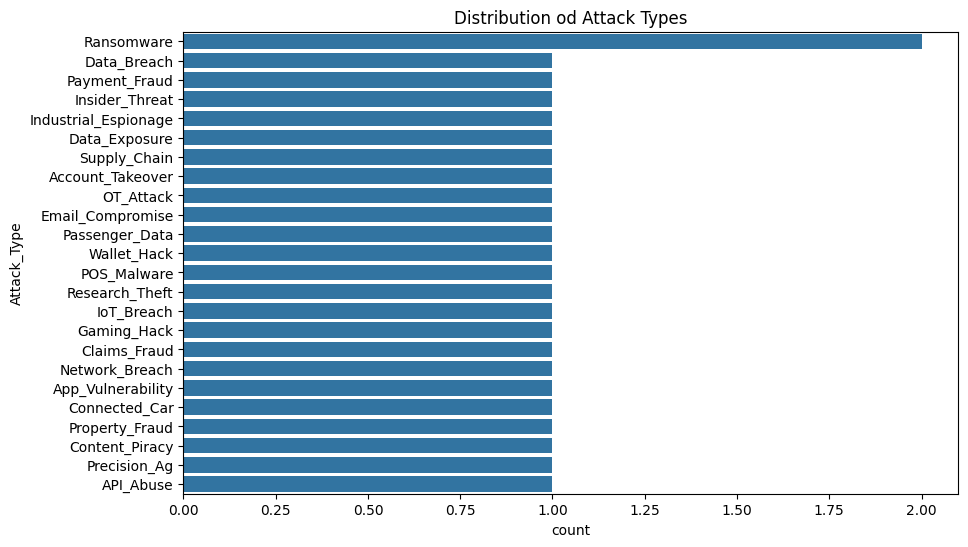

In [ ]:
# Visualize the distribution of attack types
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y = 'Attack_Type', data = df, order = df['Attack_Type'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.show()

b. Financial Loss by Industry



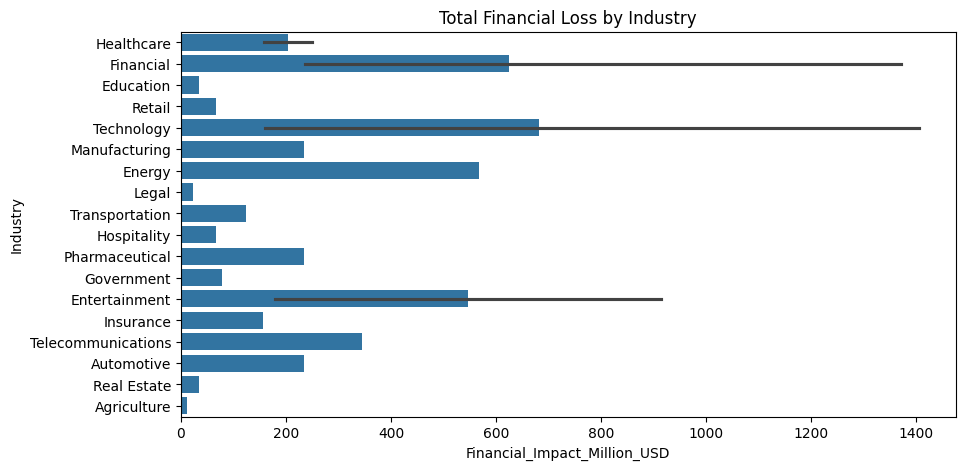

In [ ]:
# Visualize total financial loss by industry
plt.figure(figsize = (10,5))
sns.barplot(x = 'Financial_Impact_Million_USD',y = 'Industry',data = df,estimator = sum)
plt.title("Total Financial Loss by Industry")
plt.show()

c. Correlation Analysis

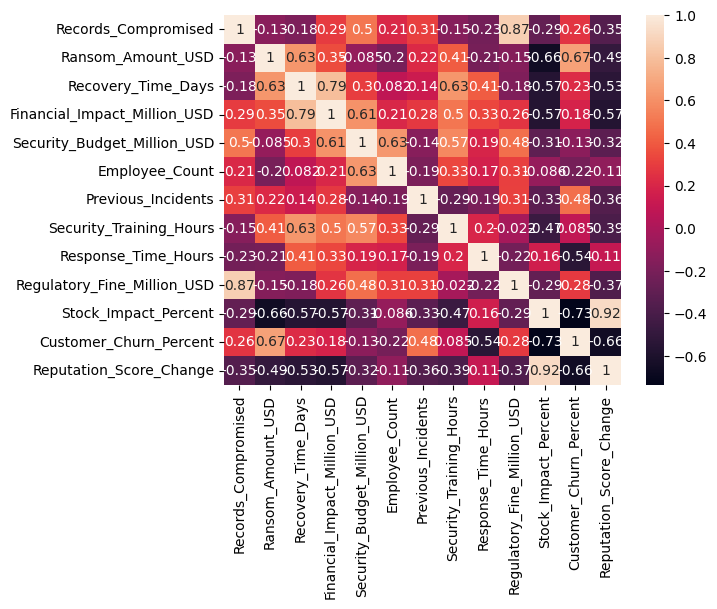

In [ ]:
# Correlation analysis for numeric columns
df.corr(numeric_only = True)
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.title('Correlation Heatmap')
plt.show()

## 4. Risk Factor Analysis
Let's analyze how security posture and measures affect financial impact and incident severity.

### Risk Factor Analysis

a. Group by Security Posture



In [ ]:
# Analyze average financial impact by MFA adoption
df.groupby('MFA_Enabled')['Financial_Impact_Million_USD'].mean()

MFA_Enabled
No         117.960000
Partial    262.250000
Yes        185.927273
Name: Financial_Impact_Million_USD, dtype: float64

b. Severity vs. Security Measures



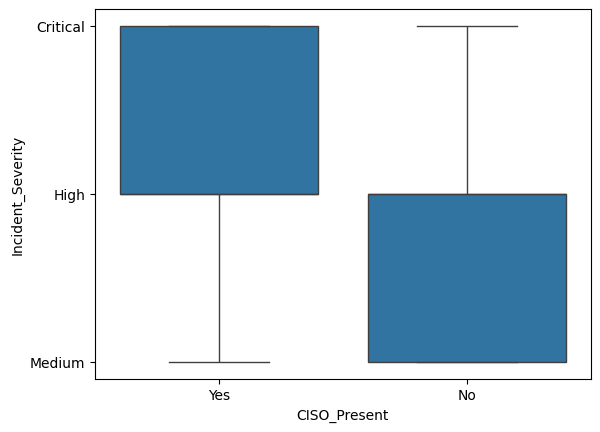

In [ ]:
# Visualize incident severity by CISO presence
sns.boxplot(x= 'CISO_Present',y = 'Incident_Severity',data = df)
plt.show()

## 5. Predictive Modeling: Financial Impact
Let's build a machine learning model to predict the financial impact of incidents based on organization and incident features.

In [ ]:
# Import required libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Select features and target variable
features = ['Industry','Attack_Type','MFA_Enabled','CISO_Present']
X = pd.get_dummies(df[features])
y = df['Financial_Impact_Million_USD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and train the Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
print("Test Score :", model.score(X_test, y_test))

Test Score : -0.6774374122430384


---
## 6. Conclusion & Next Steps
In this notebook, we explored a real-world cybersecurity incidents dataset, performed EDA, analyzed risk factors, and built a predictive model for financial impact. You can extend this analysis by:

- Exploring more advanced machine learning models

- Investigating feature importance and interpretability

- Creating interactive dashboards or reports for business users

- Writing a Medium post summarizing your findings and visualizations!


**Thank you for exploring data mining in cybersecurity!**